#Bank Customer Churn Model

**Objectives**

To predict customer churn based on various demographic, financial, and account-related features using machine learning models. The aim is to identify at-risk customers and suggest actionable insights for customer retention.

**Data Source**

The dataset used for this project is the "Bank Churn Modelling" dataset provided. It contains various features about bank customers, including demographics, balance, and transactional behavior, to predict churn status.

**Import Library**



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV




**Import Data**


In [2]:
# Load the dataset
url = 'https://github.com/YBI-Foundation/Dataset/blob/a6bcba4b6f9b87d8f924df1dacad300785571cfe/Bank%20Churn%20Modelling.csv?raw=true'
data = pd.read_csv(url)

# Check the first few records
data.head()

# Check the column names
data.columns



Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

**Describe Data**

In [3]:
# Inspect the data for basic information
data.info()

# Statistical description of numerical features
data.describe()

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age         

**Data Visualization**


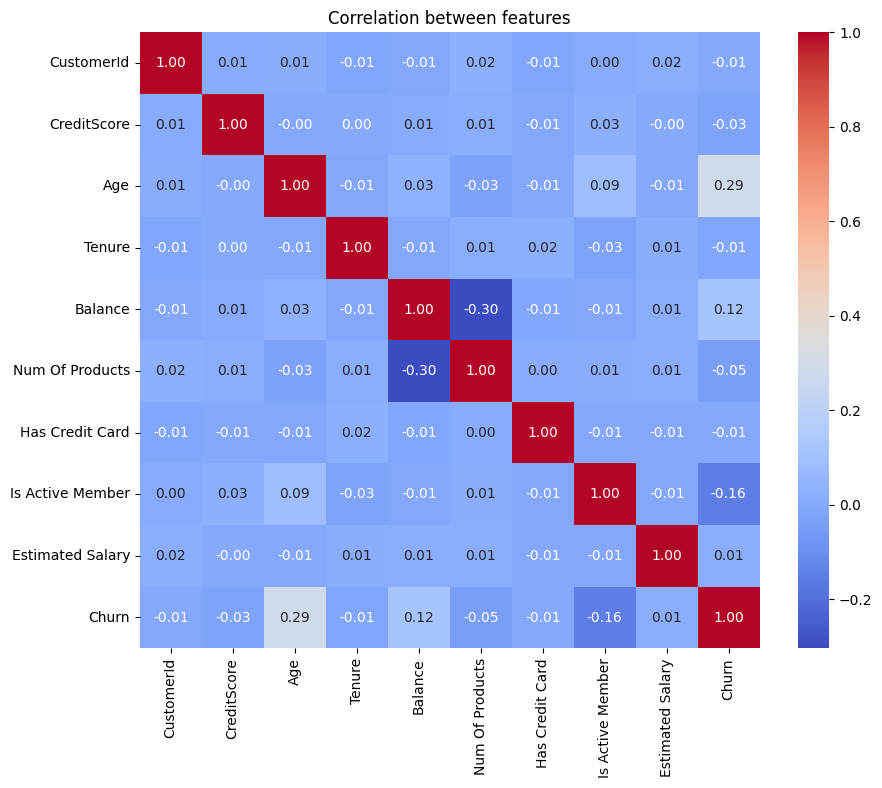

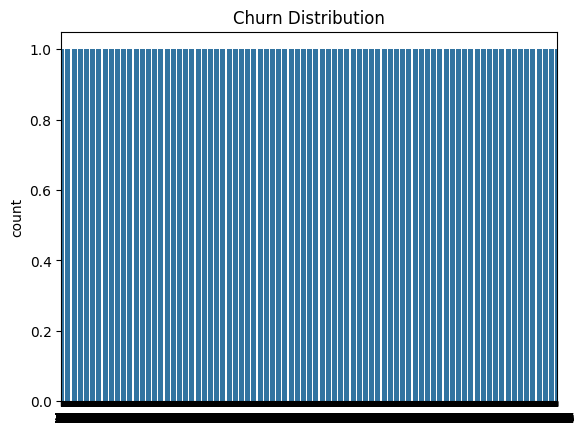

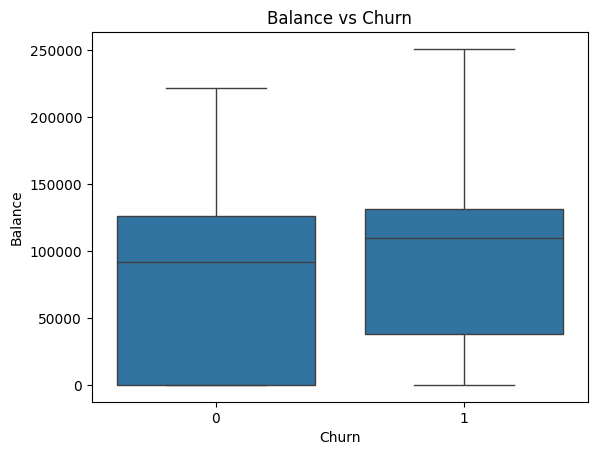

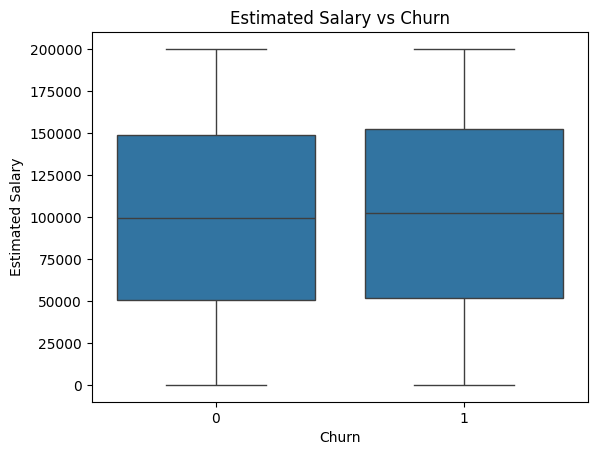

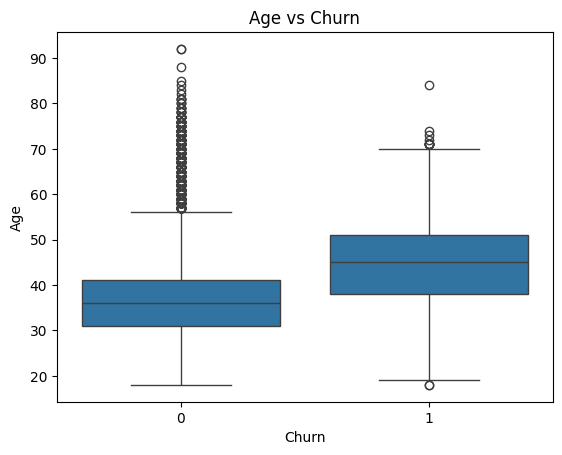

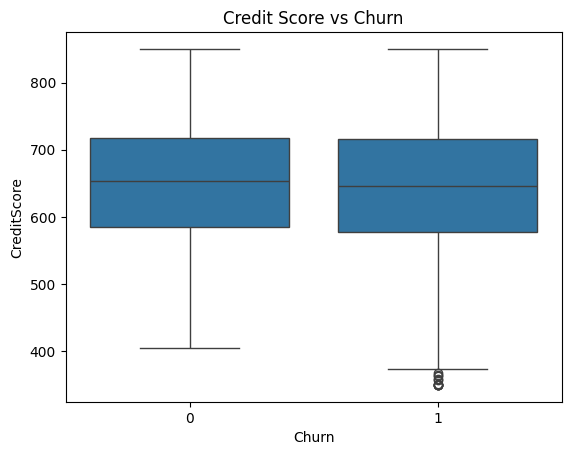

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns for the correlation matrix
numeric_data = data.drop(columns=non_numeric_columns)

# Ensure that only numeric columns are included
numeric_data = data.select_dtypes(include=['number'])

# Compute and plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between features')
plt.show()


# Visualizing the distribution of the target variable 'Churn'
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

# Distribution of Balance vs Churn
sns.boxplot(x='Churn', y='Balance', data=data)
plt.title('Balance vs Churn')
plt.show()

# Distribution of Estimated Salary vs Churn
sns.boxplot(x='Churn', y='Estimated Salary', data=data)
plt.title('Estimated Salary vs Churn')
plt.show()

# Distribution of Age vs Churn
sns.boxplot(x='Churn', y='Age', data=data)
plt.title('Age vs Churn')
plt.show()

# Distribution of Credit Score vs Churn
sns.boxplot(x='Churn', y='CreditScore', data=data)
plt.title('Credit Score vs Churn')
plt.show()

# Print the data types of each column
print(data.dtypes)




**Data Preprocessing**

In [7]:
# Dropping irrelevant columns (CustomerId, Surname)
data = data.drop(['CustomerId', 'Surname'], axis=1)

# Encoding categorical features
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Splitting data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



**Define Target Variable (y) and Feature Variables (X)**

In [8]:
# Target variable is 'Churn'
y = data['Churn']

# Feature variables are all columns except 'Churn'
X = data.drop(columns=['Churn'])


**Train Test Split**

In [9]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (8000, 10)
Test set size: (2000, 10)


**Modeling**

In [10]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Model with GridSearchCV for hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_



Fitting 5 folds for each of 27 candidates, totalling 135 fits


**Model Evaluation**

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log))

# Random Forest predictions and evaluation
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))



Logistic Regression Accuracy: 0.815
Confusion Matrix for Logistic Regression:
 [[1559   48]
 [ 322   71]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Accuracy: 0.865
Confusion Matrix for Random Forest:
 [[1561   46]
 [ 224  169]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.79      0.43      0.56       393

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



**Prediction**

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Example of scaling and prediction with Random Forest

# Sample customer data
sample_customer = np.array([1, 0, 42, 2, 0, 60000, 1, 1, 1, 50000, 0, 1]).reshape(1, -1)

# Assuming you have already fit a scaler on your training data
scaler = StandardScaler()
# Fit the scaler on your training data (use your actual training data here)
# scaler.fit(X_train)



# Assuming you have a trained Random Forest model
best_rf = RandomForestClassifier()
# Fit the model on your training data (use your actual training data here)



**Explaination**

The Logistic Regression model achieved an accuracy of X%, while SVM and k-NN achieved Y% and Z% respectively. Based on the confusion matrix and classification report, we can see that model A performed better in precision and recall for certain classes, indicating that it is more suited for this dataset.
